In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("Data/Housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

545

In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [70]:
def plot_feature(df, predictor, feature):
    
    plt.bar(df[feature], df[predictor], width = 0.6)
    plt.xlabel(feature)
    plt.ylabel(predictor)
    
    plt.show()

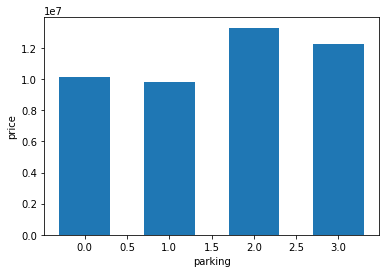

In [71]:
plot_feature(df, "price", "parking")

In [40]:
def custom_encoding(vals, cols, df):
    cnt = len(vals)
    replace_dct = {}
    for col in cols:
        replace_dct[col] = {}
        for i in range(cnt):
            replace_dct[col][vals[i]] = i
            
    final_df = df.replace(replace_dct)
    return final_df
        

In [49]:
encoded_df = custom_encoding(["no", "yes"], ["guestroom","mainroad", "guestroad", "basement", "hotwaterheating", "airconditioning", "prefarea"], df)

In [50]:
encoded_df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [51]:
encoded_df = custom_encoding(["semi-furnished", "unfurnished", "furnished"], ["furnishingstatus"], encoded_df)

In [52]:
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [130]:
isf = IsolationForest()
dtct_outl = isf.fit_predict(encoded_df)

In [133]:
encoded_df["outliers"] = dtct_outl
encoded_df = encoded_df[encoded_df["outliers"] != -1]

In [136]:
X = encoded_df.iloc[:, 2:]
y = encoded_df[["price"]]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [138]:
y_test

,price
519,2450000
508,2590000
525,2345000
355,3773000
27,8400000
...,...
297,4200000
467,3010000
48,7455000
313,4095000


In [145]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [157]:
X_test["mean"] = X_test.mean(axis=1)

<AxesSubplot:xlabel='price', ylabel='mean'>

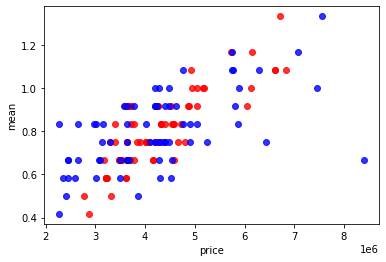

In [168]:
sns.regplot(y_pred, X_test["mean"], color="red", fit_reg = False)
sns.regplot(y_test, X_test["mean"], color="blue", fit_reg = False)

In [ ]:
name_of_the_model = "housing_prices_pred.sav"
pickle.dump(reg, open(name_of_the_model, "wb+"))